In [3]:
%matplotlib inline
from collections import Counter
import glob
from itertools import groupby
import os

from IPython.core.display import HTML
from matplotlib import gridspec
import matplotlib.pyplot as mpl
import pandas as pd
import screed
from scipy.stats import ks_2samp
import seaborn as sns

from gscripts.general import dataviz


In [201]:
name_map = {"taf15": "TAF15",
           "fus": "FUS",
           "tdp43": "TDP43"}
color_map = {"fus": '#43A247',
              'taf15': '#DB1D3D',
              'tdp43': '#712878',
              'fus_taf15': 'c',
              'taf15_tdp43': 'c'}

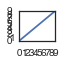

In [6]:
num_cols = 1
num_rows = 1
with dataviz.Figure("foo.svg", figsize=(1.0 * num_cols, 1.0 * num_rows)) as fig:
    ax = fig.add_subplot(1,1,1)
    ax.plot(range(10))

        

In [5]:
from clipper.src import CLIP_analysis
from clipper.src import kmerdiff

img_dir = "/nas3/gpratt/Dropbox/TAF15/Data/bindnseq/figures"
imp_dir = "/nas3/gpratt/Dropbox/IMP_team/rbns_figures/"

/nas3/gpratt/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [7]:
def move_name(interval):
    interval.name = interval[12]
    return interval

def move_name_eric(interval):
    interval.name = interval[9]
    return interval

def trim_intervals(interval):
    return pybedtools.interval_constructor(interval[:6])

In [128]:
mv /nas3/gpratt/ENCFF194JNW.tsv .

In [8]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/RBNS/igf2bp1_enrichment_R.6mers.csv .
!scp tscc-login.sdsc.edu:/home/gpratt/projects/encode/analysis/encode_v4/Stefan_IGF2BP1_040915_IGF2BP1merged.peaks.bed .
    
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_IGF2BP1_040915_IGF2BP1merged.bam_vs_Stefan_Input_040915_GAGATTCC-ATAGAGGC_R2.unassigned.polyATrim.adapterTrim.adapterTrim.round2.rmRep.rmDup.sorted.bam_basedon_Stefan_IGF2BP1_040915_IGF2BP1merged.peaks.bed_l2inputnormnew.2_l2foldenr.2_l10pval.bed igf2bp1_better_peaks.bed
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_IGF2BP1_040915_IGF2BP1merged.bam_vs_Stefan_Input_040915_GAGATTCC-ATAGAGGC_R2.unassigned.polyATrim.adapterTrim.adapterTrim.round2.rmRep.rmDup.sorted.bam_basedon_Stefan_IGF2BP1_040915_IGF2BP1merged.peaks.bed_l2inputnormnew.4_l2foldenr.5_l10pval.bed igf2bp1_highly_enrcihed_peaks.bed

igf2bp1_enrichment_R.6mers.csv                100%  197KB 197.4KB/s   00:00    
Stefan_IGF2BP1_040915_IGF2BP1merged.peaks.bed 100% 8282KB   8.1MB/s   00:00    
Stefan_IGF2BP1_040915_IGF2BP1merged.bam_vs_St 100% 1388KB   1.4MB/s   00:00    
Stefan_IGF2BP1_040915_IGF2BP1merged.bam_vs_St 100%  205KB 204.9KB/s   00:00    


In [63]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/S02S05_overlapping.peaks.bed.S02S05_all.bed . 
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/S02S05_overlapping.peaks.bed.S02S05_l10p2_l2fc0.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/S02S05_overlapping.peaks.bed.S02S05_l10p5_l2fc1.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/S02S05_overlapping.peaks.bed.S02S05_l10p5_l2fc4.bed .

S02S05_overlapping.peaks.bed.S02S05_all.bed   100% 4483KB   4.4MB/s   00:00    
S02S05_overlapping.peaks.bed.S02S05_l10p2_l2f 100%  610KB 610.4KB/s   00:00    
S02S05_overlapping.peaks.bed.S02S05_l10p5_l2f 100%  239KB 239.2KB/s   00:00    
S02S05_overlapping.peaks.bed.S02S05_l10p5_l2f 100%   63KB  62.6KB/s   00:00    


In [216]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_2.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_4.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_2.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_4.bed .

Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100% 4979KB   4.9MB/s   00:01    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  787KB 786.9KB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  716KB 715.6KB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  121KB 120.9KB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100% 3364KB   3.3MB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100%  495KB 494.9KB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100%   54KB  54.3KB/s   00:00    


In [181]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_2.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_4.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_0_l2f_-99.bed . 
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_2.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_4.bed .

Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100% 4979KB   4.9MB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  787KB 786.9KB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  716KB 715.6KB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  121KB 120.9KB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100% 3364KB   3.3MB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100%  495KB 494.9KB/s   00:01    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100%   54KB  54.3KB/s   00:00    


#Calculate z-scores from bind-n-seq

In [9]:
def calculate_z_score(rbns):
    
    #get the most enriched column
    max_column = rbns.max()
    max_column = max_column[max_column == max_column.max()].index[0]
    
    mean = rbns[max_column].mean()
    std  = rbns[max_column].std()

    zscore = rbns[max_column].apply(lambda x: (x - mean) / std)
    return zscore

In [174]:
taf15 = pd.read_table("ENCFF796QEY.tsv", index_col=0)
fus = pd.read_table("/nas3/gpratt/Dropbox/TAF15/Data/bindnseq/FUS_enrichment_R.6mers.txt", index_col=0)
igf2bp1 = pd.read_table("igf2bp1_enrichment_R.6mers.csv", index_col=0).dropna()
igf2bp2 = pd.read_table("ENCFF359JRV.tsv", index_col=0)

In [177]:
fus_zscore =  calculate_z_score(fus)
taf15_zscore = calculate_z_score(taf15)
igf2bp1_zscore = calculate_z_score(igf2bp1)
igf2bp2_zscore = calculate_z_score(igf2bp2)

#Calculate CLIP-seq Enrichment

In [131]:
regions, all_regions = CLIP_analysis.regions_generator()

genes = pybedtools.BedTool("/nas3/gpratt/clipper/clipper/data/regions/mm9_genes.bed")


rbps = {"taf15": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TAF15_combined_notrim_ingenes_clusters_mm950.bed"),
        "fus": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TLS_hiseq_notrim_ingenes_clusters_mm950.bed"),
        "tdp43": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TDP43brainclip_MP41_kcomb_notrim_ingenes_clusters_mm950.bed"),
       }

assigned_rbps_mouse = {}
for name, rbp in rbps.items():
    overlapping_genes = rbp.intersect(genes, wo=True, s=True).each(move_name).saveas()

    assigned_rbps_mouse[name] = CLIP_analysis.assign_to_regions(overlapping_genes, os.path.splitext(rbp.fn)[0], 
                                    regions, "assigned", nrand=10, species="mm9")

There are a total 69657 clusters I'll examine
For region: cds found 521 that overlap and 69136 that don't
For region: three_prime_utrs found 2999 that overlap and 66137 that don't
For region: five_prime_utrs found 194 that overlap and 65943 that don't
For region: proxintron500 found 8425 that overlap and 57518 that don't
For region: distintron500 found 57457 that overlap and 61 that don't
After assigning 61 un-categorized regions
There are a total 155599 clusters I'll examine
For region: cds found 13193 that overlap and 142406 that don't
For region: three_prime_utrs found 10705 that overlap and 131701 that don't
For region: five_prime_utrs found 944 that overlap and 130757 that don't
For region: proxintron500 found 21211 that overlap and 109546 that don't
For region: distintron500 found 109329 that overlap and 217 that don't
After assigning 217 un-categorized regions
There are a total 44610 clusters I'll examine
For region: cds found 1470 that overlap and 43140 that don't
For region: t

In [132]:
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_bed.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_bed.l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_bed.l10_5_l2f_4.bed .

!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_bed.l10_0_l2f_-99.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_bed.l10_5_l2f_1.bed .
!scp tscc-login.sdsc.edu:/home/elvannostrand/data/clip/CLIPseq_analysis/IGF2BP_analysis_061615/Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_bed.l10_5_l2f_4.bed .

Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100% 3364KB   3.3MB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100%  555KB 554.9KB/s   00:00    
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_w 100%   54KB  54.3KB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100% 4979KB   4.9MB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  787KB 786.9KB/s   00:00    
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_w 100%  121KB 120.9KB/s   00:01    


In [217]:
regions, all_regions = CLIP_analysis.regions_generator()

genes = pybedtools.BedTool("/nas3/gpratt/clipper/clipper/data/regions/hg19_genes.bed")





rbps = {"Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_0_l2f_-99.bed": pybedtools.BedTool("Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_0_l2f_-99.bed"),
"Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_1.bed": pybedtools.BedTool("Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_1.bed"),
"Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_2.bed": pybedtools.BedTool("Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_2.bed"),
"Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_4.bed": pybedtools.BedTool("Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_4.bed"),
"Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_0_l2f_-99.bed": pybedtools.BedTool("Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_0_l2f_-99.bed"),
"Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_2.bed": pybedtools.BedTool("Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_2.bed"),
"Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_4.bed": pybedtools.BedTool("Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_4.bed"),

       }

assigned_rbps = {}
for name, rbp in rbps.items():
    if name == "igf2bp1":
        tmp_move_name = move_name_eric
    else:
        tmp_move_name = move_name
    overlapping_genes = rbp.intersect(genes, wo=True, s=True).each(tmp_move_name).each(trim_intervals).saveas()

    assigned_rbps[name] = CLIP_analysis.assign_to_regions(overlapping_genes, os.path.splitext(rbp.fn)[0], 
                                    regions, "assigned", nrand=10, species="hg19")

Not Valid bed12 file, continuing processing, some things may be strange
There are a total 5454 clusters I'll examine
For region: cds found 1353 that overlap and 4101 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: three_prime_utrs found 3806 that overlap and 295 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: five_prime_utrs found 35 that overlap and 260 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: proxintron500 found 62 that overlap and 198 that don't
Not Valid bed12 file, continuing processing, some things may be strange
For region: distintron500 found 159 that overlap and 39 that don't
Not Valid bed12 file, continuing processing, some things may be strange
After assigning 39 un-categorized regions
Not Valid bed12 file, continuing processing, some things may be strange
There are a total 7877 clusters I'll examine
For region: cds found 2111 th

In [218]:
for name in assigned_rbps:
    CLIP_analysis.make_fasta_files_from_regions(assigned_rbps[name], name, "fasta", "/nas3/yeolab/Genome/ucsc/hg19/chromosomes/all.fa")
    
for name in assigned_rbps_mouse:
    CLIP_analysis.make_fasta_files_from_regions(assigned_rbps_mouse[name], name, "fasta", "/nas3/yeolab/Genome/ucsc/mm9/chromosomes/all.fa")

In [219]:
def kmer_enrichment(header):
    fasta_files = glob.glob("fasta/{}.*.fa".format(header))
    kmers = {}
    for group, lst in groupby(sorted(fasta_files), key=lambda x: os.path.basename(x).split(".")[-3]):
        lst = list(lst)
        if len(lst) != 2:
            print "bad length, continuing", group
            continue

        random, real = lst
        kmer = kmerdiff.kmer_diff(real, random, 6)
        kmer = pd.DataFrame(kmer[0]).T
        kmer.columns = ['freq1', 'freq2', 'delta']
        kmer.index.name = "kmer"
        kmers[group] = kmer
    return pd.concat(kmers)

In [220]:
kmer_dict = {}
for name in assigned_rbps:
    kmer_dict[name] = kmer_enrichment(name)
    
kmer_dict_mouse = {}
for name in assigned_rbps_mouse:
    kmer_dict_mouse[name] = kmer_enrichment(name)

bad length, continuing uncatagorized
bad length, continuing uncatagorized
bad length, continuing uncatagorized
bad length, continuing uncatagorized
bad length, continuing uncatagorized
bad length, continuing uncatagorized
bad length, continuing uncatagorized
bad length, continuing uncatagorized
bad length, continuing uncatagorized
bad length, continuing uncatagorized


#Plot the comparison between the two

In [212]:
def plot_bindnseq(zscore, kmer, img_path, motif="GGTA", name="", color='r'):
    num_rows = 4
    num_cols = 4
    with dataviz.Figure(img_path, figsize=(3.0, 3.0)) as fig:
        gs = gridspec.GridSpec(num_rows, num_cols)

        joined = pd.concat([kmer.delta, zscore], axis=1)
        joined.columns = ['kmer', 'rbns']
        filtered = joined[[motif in item for item in joined.index]]

        ax = fig.add_subplot(gs[0, 0:3])
        sns.kdeplot(joined['rbns'], ax=ax, color='k')
        sns.kdeplot(filtered['rbns'], ax=ax, color=color)
        legend = ax.legend()
        legend.remove()
        ax.set_yticks([])
        ax.set_xticks([])
        ax.text(.8, 1, "p-val {:.2}".format(ks_2samp(joined['rbns'], filtered['rbns'])[1]),
               transform=ax.transAxes, fontsize=8)
        sns.despine(ax=ax, left=True)
        [tick.set_fontsize(8) for tick in ax.get_xticklabels()]

        ax = fig.add_subplot(gs[1:4, 3])
        sns.kdeplot(joined['kmer'], ax=ax, vertical=True, color='k')
        sns.kdeplot(filtered['kmer'], ax=ax, vertical=True, color=color)
        ax.text(.1,.05, "p-val {:.2}".format(ks_2samp(joined['kmer'], filtered['kmer'])[1]),
               transform=ax.transAxes, fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])
        legend = ax.legend()
        legend.remove()
        sns.despine(ax=ax, bottom=True)
        [tick.set_fontsize(8) for tick in ax.get_xticklabels()]
        ax = fig.add_subplot(gs[1:4,0:3])
        line1 = ax.scatter(joined['rbns'], joined['kmer'], alpha=.5, color='k', s=1, label="Other", 
                           #rasterized=True
                          )
        line2 = ax.scatter(filtered['rbns'], 
                           filtered['kmer'],
                           alpha=.5, 
                           s=5, 
                           label="Contains {}".format(motif),
                           color=color
                           #rasterized=True
                          )
        ax.set_ylabel(name + "\nCLIP Cluster 6-mer Enrichment")
        lgnd = ax.legend(loc=4, scatterpoints=1, fontsize=8)
        #ax.set_xticks([])
        ax.set_xlabel(name + " RBNS R Z-Score")

        sns.despine(ax=ax)
        lgnd.legendHandles[0]._sizes = [30]
        lgnd.legendHandles[1]._sizes = [30] 

#Looking at IGF2bp1

In [227]:
def save_all_plots(kmer_dict, zscore, fn, name="", motif="CACA", color='r', img_dir="/nas3/gpratt/Dropbox/TAF15/Data/bindnseq/figures"):
    plot_bindnseq(zscore, kmer_dict.ix['all'], os.path.join(img_dir,'all_{}.svg'.format(fn)), motif=motif, name=name, color=color )
    plot_bindnseq(zscore, kmer_dict.ix['five_prime_utrs'], os.path.join(img_dir,'five_prime_utrs_{}.svg'.format(fn)), motif=motif, name=name, color=color)
    plot_bindnseq(zscore, kmer_dict.ix['cds'], os.path.join(img_dir,'cds_{}.svg'.format(fn)), motif=motif, name=name, color=color)
    plot_bindnseq(zscore, kmer_dict.ix['three_prime_utrs'], os.path.join(img_dir,'three_prime_utrs_{}.svg'.format(fn)), motif=motif, name=name, color=color)
    plot_bindnseq(zscore, kmer_dict.ix['proxintron500'], os.path.join(img_dir,'proxintron500_{}.svg'.format(fn)), motif=motif, name=name, color=color)
    plot_bindnseq(zscore, kmer_dict.ix['distintron500'], os.path.join(img_dir,'distintron500_{}.svg'.format(fn)), motif=motif, name=name, color=color)

tdp43
fus
taf15


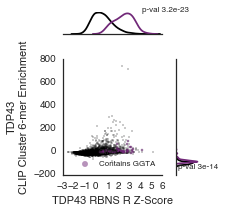

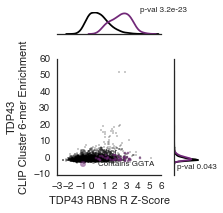

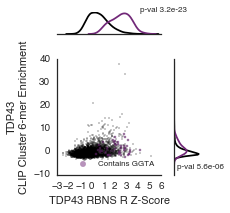

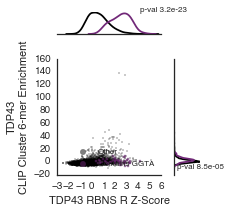

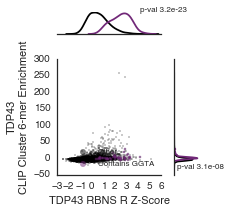

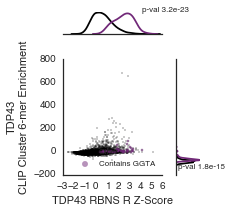

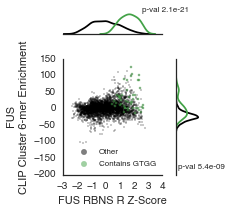

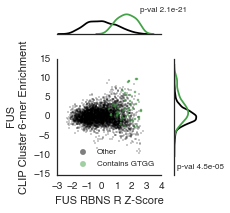

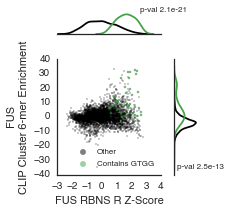

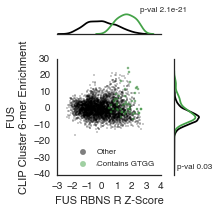

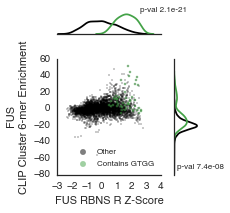

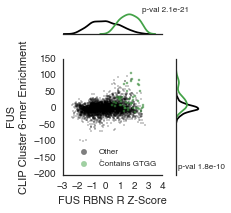

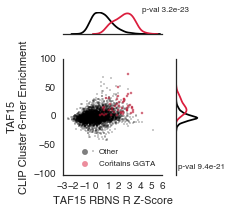

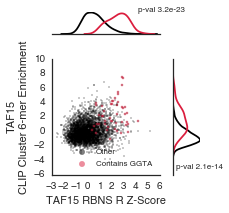

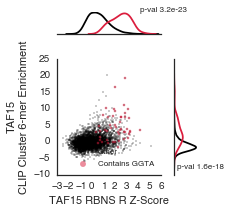

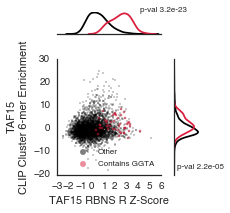

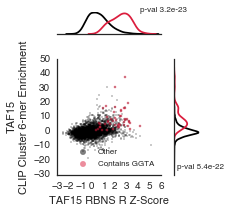

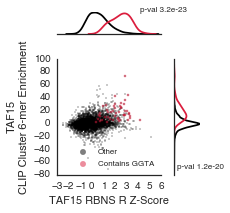

In [228]:
img_dir = "/nas3/gpratt/Dropbox/TAF15/Data/bindnseq/figures"
for name, kmers in kmer_dict_mouse.items():
    print name
    cur_zscore = fus_zscore if "fus" in name else taf15_zscore
    cur_motif = "GTGG" if "fus" in name else "GGTA"

    save_all_plots(kmers, cur_zscore, name, name_map[name], cur_motif, color_map[name], img_dir=img_dir)

Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_2.bed
False
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_2.bed
True
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_1.bed
True
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_5_l2f_4.bed
True
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_5_l2f_4.bed
False
Stefan_1to200_Imp1_IGF2BP1merged_overlapped_with_Stefan_IGF2BP1_040915_IGF2BP1merged.l10_0_l2f_-99.bed
True
Stefan_1to200_Imp2_IGF2BP2merged_overlapped_with_Stefan_IGF2BP2_040915_IGF2BP2merged.l10_0_l2f_-99.bed
False


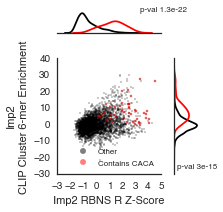

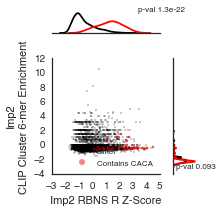

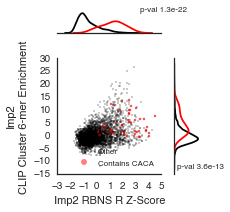

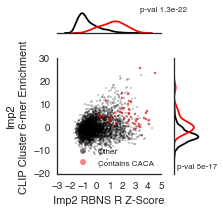

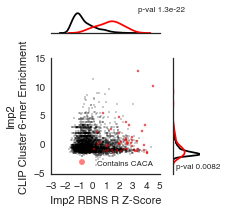

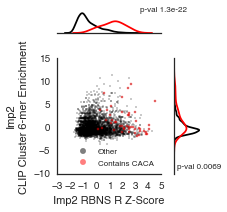

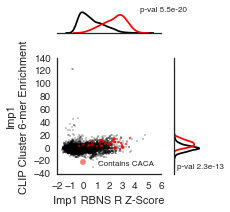

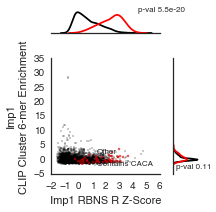

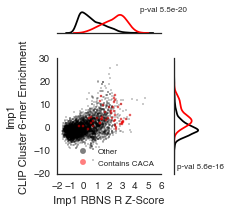

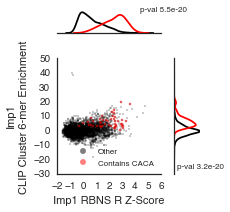

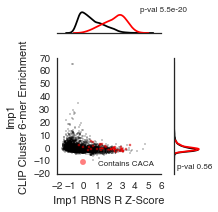

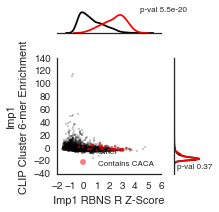

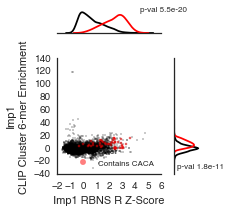

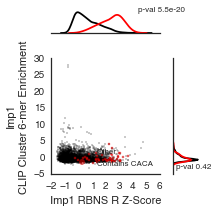

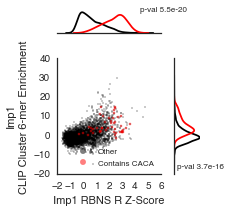

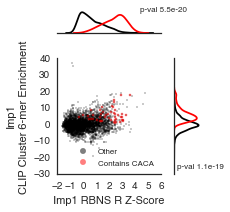

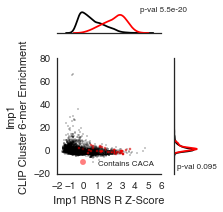

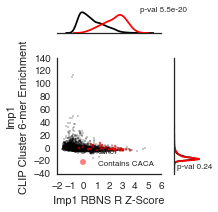

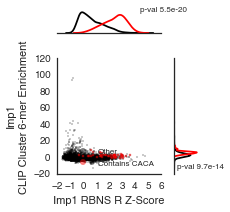

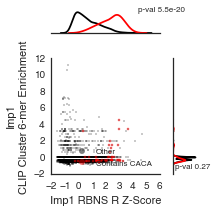

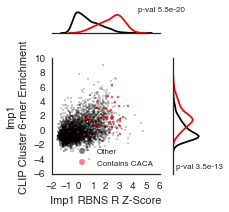

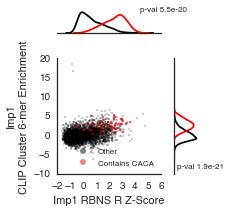

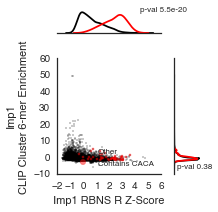

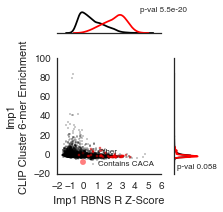

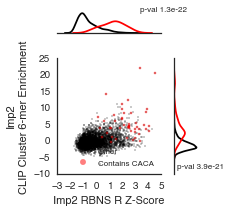

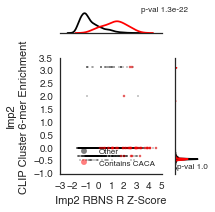

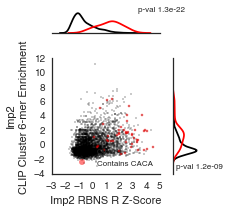

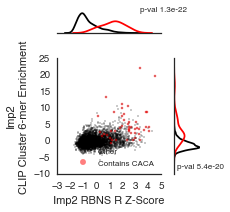

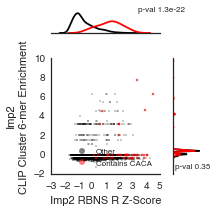

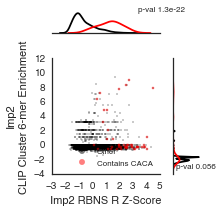

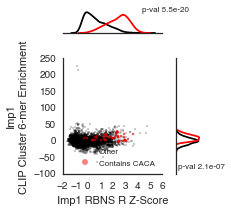

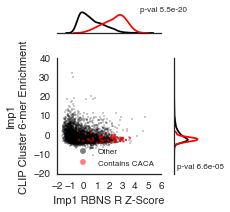

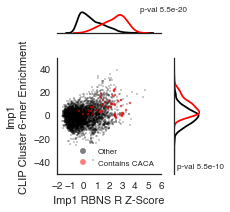

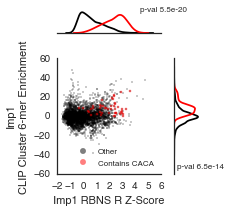

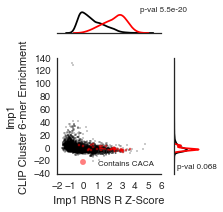

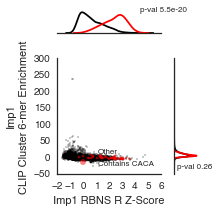

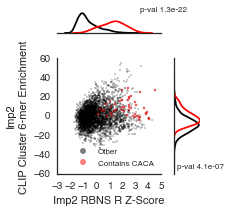

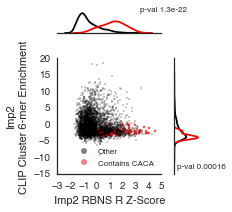

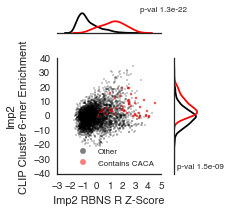

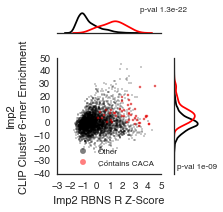

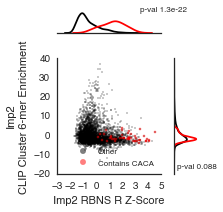

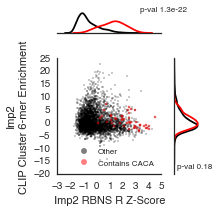

In [230]:
img_dir = "/nas3/gpratt/Dropbox/IMP_team/rbns_figures/"
for name, kmers in kmer_dict.items():
    print name
    cur_zscore = igf2bp1_zscore if "Imp1" in name else igf2bp2_zscore
    output_name = "Imp1" if "Imp1" in name else "Imp2"
    print "Imp1" in name
    save_all_plots(kmers, cur_zscore, name, output_name, img_dir=img_dir)

In [55]:
joined = pd.concat([igf2bp1_zscore, igf2bp1_kmers.delta.unstack().T], axis=1)
joined.to_csv("kmer_enrichment.csv", sep="\t")
!scp kmer_enrichment.csv tscc-login.sdsc.edu:/home/gpratt/projects/imp_family/analysis/ad-hoc

kmer_enrichment.csv                           100%  567KB 566.7KB/s   00:00    


In [56]:
joined = pd.concat([igf2bp1_zscore, igf2bp1_old_kmers.delta.unstack().T], axis=1)
joined.to_csv("kmer_old_enrichment.csv", sep="\t")
!scp kmer_old_enrichment.csv tscc-login.sdsc.edu:/home/gpratt/projects/imp_family/analysis/ad-hoc
    


kmer_old_enrichment.csv                       100%  564KB 563.6KB/s   00:00    


In [ ]:
joined = pd.concat([igf2bp1_zscore, igf2bp1_enriched_kmers.delta.unstack().T], axis=1)
joined.to_csv("kmer_enriched_enrichment.csv", sep="\t")
!scp kmer_enriched_enrichment.csv tscc-login.sdsc.edu:/home/gpratt/projects/imp_family/analysis/ad-hoc